# Lab2A - Introduction to PyTorch

Tensor (`torch.tensor`) is the data structure used in PyTorch to build a deep learning system. Tensors are similar to NumPy's `ndarrays`, with the addition being that Tensors can also be used on a GPU to accelerate computing.

### Objectives:
In this lab, you learn how to 
* Create tensors in PyTorch 
* Perform mathematical operation on tensors
* Convert between PyTorch tensor and Numpy array
* Reshape a PyTorch tensor
* Transfer tensor to and from GPU 

#### Table of Content:
1. [Creating tensors](#1.-Creating-tensors)
2. [Tensor operations](#2.-Tensor-Operations)
3. [Indexing](#3.-Indexing)
4. [Reshaping tensors](#4.-Reshaping-Tensors)
5. [CUDA Tensors](#6.-CUDA-Tensors)
6. [Exercise](#Exercise)

#### Reference:

* [PyTorch Official Tutorial: What is PyTorch](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
---

## 1. Creating tensors

In [ ]:
...

Construct a 5x3 matrix, uninitialized

In [ ]:
...
print(x)

Construct a tensor filled with random numbers from a uniform distribution on the interval `[0, 1)`.

In [ ]:
...
print(x)

Construct a tensor filled with random numbers from a normal distribution with mean 0 and variance 1.

In [ ]:
...
print(x)

Construct a matrix filled with zeros and of dtype long

In [ ]:
...
print(x)

In [ ]:
...
print(x)

---
## 2. Tensor Operations

#### Size of tensors

In [ ]:
x = torch.rand(5, 3)
print(x)
...

#### Addition

There are multiple syntaxes for operations.

*Addition: syntax 1*

In [ ]:
x = torch.rand(3, 2)
print('x:\n', x)
y = torch.rand(3, 2)
print('y:\n', y)

...
print('x+y:\n', z)

*Addition: syntax 2*

In [ ]:
...
print('x+y:\n', z)

*Addition: syntax 3 (in-place)*
    
- Any operation that mutates a tensor in-place is post-fixed with an `_`. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

In [ ]:
print('x\n', x)
print('y\n', y)

In [ ]:
...
print(y)

#### Multiplication

Different from numpy which uses mainly `dot` to perform different types of matrix multiplication, PyTorch uses different commands for vector-vector multiplication (`dot`), matrix-vector multiplication (`mv`) and matrix-matrix multiplication (`mm`)

**`dot`**

In [ ]:
a = torch.Tensor([4, 2])
b = torch.Tensor([3, 1])
...

print(r)

**`mv`**

In [ ]:
mat = torch.randn(2, 4)
vec = torch.randn(4)

...
print(r)

**`mm`**

In [ ]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 4)

...
print(r)

## 3. Indexing

You can use standard Numpy-like indexing with Torch

In [ ]:
x = torch.randint(0, 100, (5,10))
print(x)

In [ ]:
# accessing column 1
...

In [ ]:
# accessing columns 2 and 3
...

In [ ]:
# accessing row 1
...

In [ ]:
# accessing rows 2 and 3
...

## 4. Reshaping Tensors

**`Tensor.reshape`**

Returns a tensor with the same data and number of elements as self but with the specified shape.

In [ ]:
x = torch.randint(0, 100, (2,4))
print('x:\n', x)

In [ ]:
# Reshape from (2, 4) to (8, 1)
...

In [ ]:
# Reshape from (2, 4) to (4, 2)
...

This method returns a **view** if shape is compatible with the current shape. Else, it may return a **copy**. This allows it to work with both [contiguous and non-contigous](https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays/26999092#26999092) data.

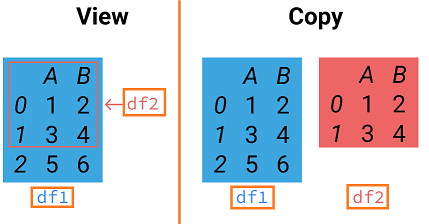

In the examples above, we create a view since the shapes of reshaped tensors `y` and `z` are compatible with the original tensor `x`. Note that after a change is performed on `x`, then the changes will occur to both `y` and `z`.

The following code confirms that `y` and `z` are indeed **views** of `x`. Any changes to `x` will be observed in `y` and `z` as well.

In [ ]:
x[0,0] = -3

print('x:\n', x)
print('y:\n', y)
print('z:\n', z)

**`Tensor.view`**

`Tensor.view` always returns a **view** of the original tensor with the new shape, i.e., it will share the underlying data with the original tensor. 

In [ ]:
x = torch.randint(0, 100, (2,4))
print('x:\n', x)

In [ ]:
# Convert from (2, 4) to (8, 1)
...
print('y:\n', y)

In [ ]:
# Convert from (2, 4) to (4, 2)
...
print('z:\n', z)

Similar to the numpy's `reshape` function, pytorch's `view` returns a reference of the original matrix albeit in a different shape

## 5. CUDA Tensors

#### Creating tensor in the GPU

In [ ]:
if ... :
    gpu = ...     # define a cuda device
    x = ...          # Create the tensor in the GPU
    print(x)

#### Creating tensor in the cpu explicitly (default )

In [ ]:
cpu = 
x = ...     # create a tensor in the CPU
print(x)

#### Transfering tensor from cpu to gpu

Transfer using the `.cuda()` command.

In [ ]:
x = torch.rand(3, 2, device = "cpu")  # create tensor in cpu. The device argument also accepts a string besides a device object
print(x)

...
print(x)

Transfer using the `.to()` command

In [ ]:
x = torch.rand(3, 2) # create tensor in the CPU (default)
print(x)
 
...
print(x)

#### Transfering tensor from gpu to cpu

Transfer using the `.cpu()` command.

In [ ]:
x = torch.rand(3, 2, device = 'cuda')  # create tensor in gpu. The device argument also accepts a string besides a device object
print(x)

...
print(x)

Transfer using the `.to()` command.

In [ ]:
x = torch.rand(3, 2, device = 'cuda')  # create tensor in the GPU
print(x)

...
print(x)

---
## Exercise

**Question 1.** The following code is used to preprocess a batch data for Logistic Regression. 

1.1  Create a random tensor `X_ori` using the normal distribution of shape `(4, 16, 16, 3)`. The tensor represent `m=4` color image samples, each having a resolution of `(16, 16)` 
   Expected ans:
    ```
    Shape of X_ori: torch.Size([4, 16, 16, 3])
    ```


In [ ]:
...
print('Shape of X_ori:', X_ori.shape)

1.2  Reshape `X_ori` into a shape of `(4, 16*16*3)`. Then transpose the result to get a tensor of shape `(768, 4)` where each column represents a sample. Save the result as `X`.

Expected ans:
```
Shape of X: torch.Size([768, 4])
```

In [ ]:
...
print('Shape of X:', X.shape)

1.3  Check if a GPU is available in the system. If yes, transfer the tensor `X` to the GPU. Then, verify if X has really been loaded into the GPU (`X.is_cuda`) and print out the device ID of the GPU (`X.get_device()`).

Expected ans:
```
X is loaded to GPU: 0
```

In [ ]:
if ...gpu is available...
   ... load x to gpu ...

if ...x is successfully loaded into GPU:
    print('X is loaded to GPU:', ... get the GPU ID...)
else:
    print('X is loaded to CPU')

---
**Question 2.** 

2.1 Create the tensor `A`. Ensure that the datatype for `A` is `float32`:
```
    A = [[3, 2, 4, 6],
         [2, 4, 2, 2],
         [5, 1, 2, 1]]
```

In [ ]:
...
print(A)

2.2 Extract the 2nd row from A. (Expected ans: `tensor([2., 4., 2., 2.])`)

In [ ]:
print(...)

2.3 Extract the 3rd column from A. (Expected ans: `tensor([4., 2., 2.])`)

In [ ]:
print(...)

2.4 Write the code to extract the following sub-block (rows 1 to 2 and columns 1 to 2) from A.

```
tensor([[4., 2.],
        [1., 2.]])
```

In [ ]:
print(...)

2.5 Compute the mean of all columns.

Expected ans:
```
tensor([3.7500, 2.5000, 2.2500], dtype=torch.float64)
```

In [ ]:
print(...)

2.6 Repeat question 2.5, but this time retain the original dimensions such that the output has a shape of (3,1) 

Expected ans:
```
tensor([[3.7500],
        [2.5000],
        [2.2500]], dtype=torch.float64)
```

In [ ]:
print(...)

<center> --- END OF LAB02A --- </center>